# Building a Linear Regression Model

---
Topics

*   Initial Exploration
*   Fitting a Simple Linear Regression Model
*   Validation of model
*   Fitting a Multiple Linear Regression Model
*   Validation of model

In [49]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy import stats
import io
from google.colab import files

In [50]:
# Load dataset Housing_Prices17
uploaded = files.upload()

Saving Housing_Prices17.csv to Housing_Prices17 (4).csv


In [51]:
# Read the uploaded CSV into pandas DataFrame
filename = list(uploaded.keys())[0]
hp = pd.read_csv(io.BytesIO(uploaded[filename]))

#Initial Exploration

In [52]:
# Basic info
print(hp.shape)
print(hp.head())
print(hp.info())

(1057, 6)
    Price  Living Area  Bedrooms  Bathrooms  Fireplaces  Age
0  142212         1982         3        1.0           0  133
1  134865         1676         3        1.5           1   14
2  118007         1694         3        2.0           1   15
3  138297         1800         2        1.0           2   49
4  129470         2088         3        1.0           1   29
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        1057 non-null   int64  
 1   Living Area  1057 non-null   int64  
 2   Bedrooms     1057 non-null   int64  
 3   Bathrooms    1057 non-null   float64
 4   Fireplaces   1057 non-null   int64  
 5   Age          1057 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 49.7 KB
None


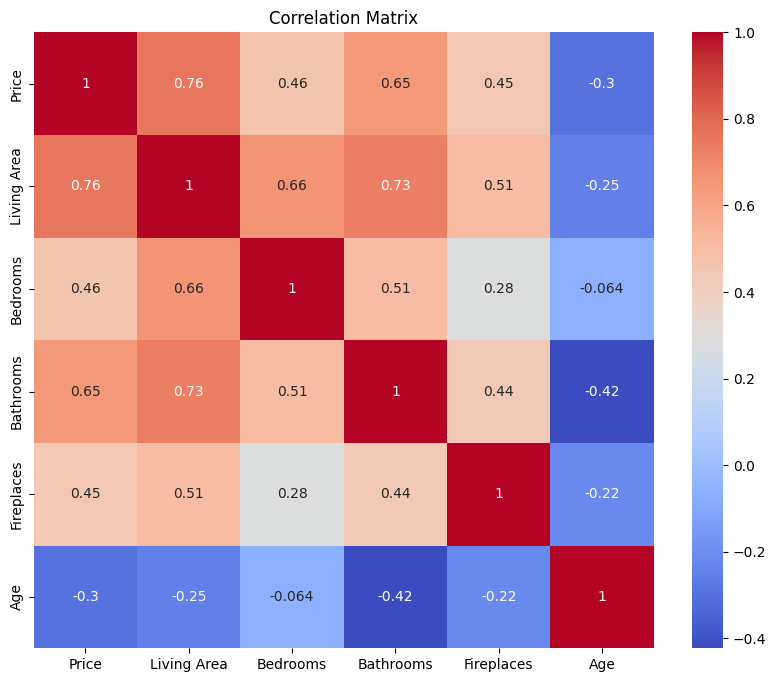

In [53]:
# ## 2. Correlation of Variables

correlation = hp.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

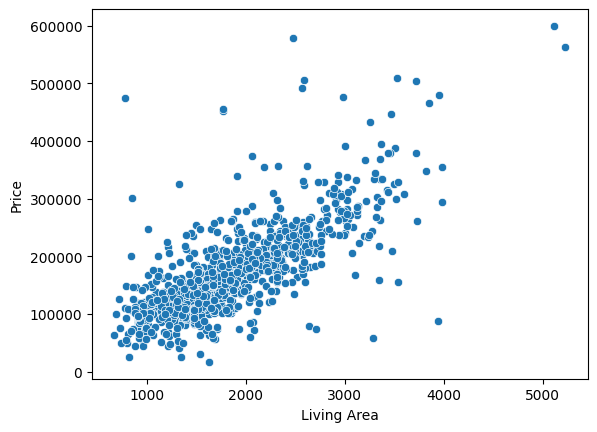

In [54]:
#3. Scatterplots
sns.scatterplot(x='Living Area', y='Price', data=hp)
plt.xlabel("Living Area")
plt.ylabel("Price")
plt.show()

#Initial Exploration

In [55]:
m1 = ols('Price ~ Q("Living Area")', data=hp).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     1431.
Date:                Sun, 31 Aug 2025   Prob (F-statistic):          1.47e-198
Time:                        03:00:08   Log-Likelihood:                -12941.
No. Observations:                1057   AIC:                         2.589e+04
Df Residuals:                    1055   BIC:                         2.590e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         7239.2809   4520.340  

#Validation of model

In [56]:
# True values and predictions
y_true = hp['Price']
y_pred = m1.fittedvalues
residuals = y_true - y_pred

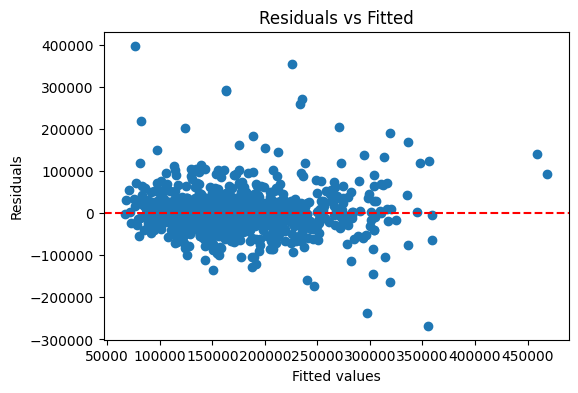

In [57]:
# ----- 1. Residuals vs Fitted -----
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

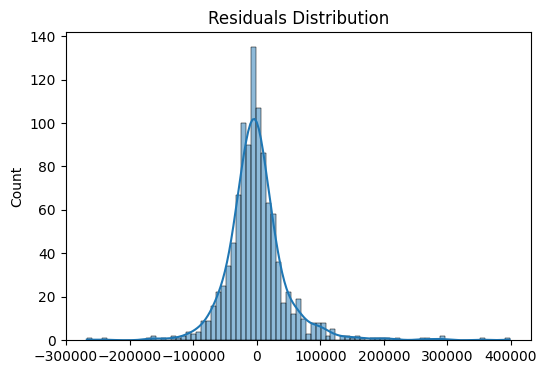

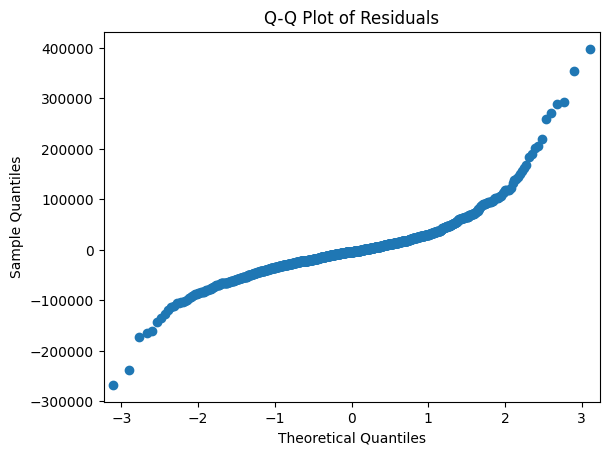

In [58]:
# ----- 2. Residuals Distribution -----
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

# Q-Q plot
sm.qqplot(residuals)
plt.title("Q-Q Plot of Residuals")
plt.show()

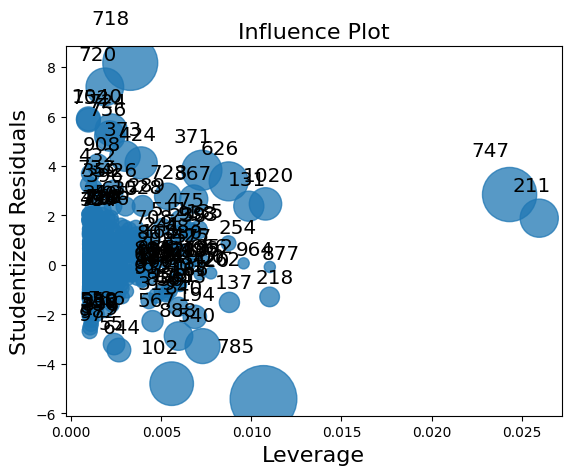

In [59]:
# ----- 3. Influence Plot -----
sm.graphics.influence_plot(m1, criterion="cooks")
plt.show()

In [60]:
# ----- 4. Key Test Statistics -----
r2 = r2_score(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

print("----- Model Validation Metrics -----")
print(f"Mean of residuals: {residuals.mean():.2f}")
print(f"Standard deviation of residuals: {residuals.std():.2f}")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

----- Model Validation Metrics -----
Mean of residuals: -0.00
Standard deviation of residuals: 50266.34
R²: 0.5756
MSE: 2524314948.20
RMSE: 50242.56
MAE: 32034.90


Interpretation:

Mean of residuals ≈ 0
 This is ideal. On average, predictions are unbiased.

Standard deviation of residuals ≈ 50,266

Typical spread of errors around the predicted prices.

R² ≈ 0.576

About 57.6% of the variation in Price is explained by Living Area alone.

MSE ≈ 2.52 × 10⁹

Average squared error looks larger due to Price being large.

RMSE ≈ 50,243

On average, predictions are off by around $50k.

MAE ≈ 32,035

The average absolute error is about $32k, which is slightly smaller than RMSE (expected if larger errors exist).

#Fitting a Multiple Linear Regression Model

In [61]:
full_m = ols('Price ~ Q("Living Area") + Bedrooms + Bathrooms + Fireplaces + Age', data=hp).fit()
print(full_m.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     321.8
Date:                Sun, 31 Aug 2025   Prob (F-statistic):          5.18e-209
Time:                        03:00:10   Log-Likelihood:                -12904.
No. Observations:                1057   AIC:                         2.582e+04
Df Residuals:                    1051   BIC:                         2.585e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.571e+04   7311.427  

# Validation of model

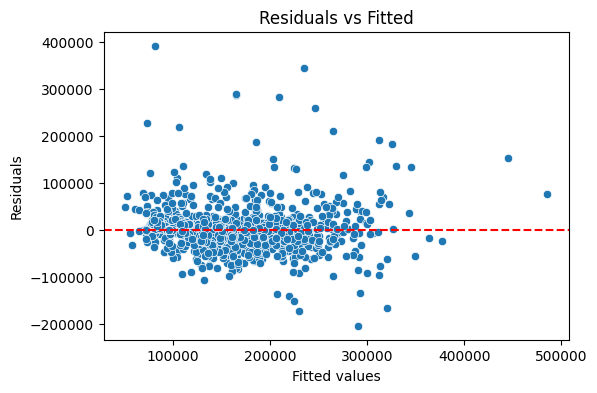

In [62]:
full_fitted = full_m.fittedvalues
full_residuals = full_m.resid

plt.figure(figsize=(6,4))
sns.scatterplot(x=full_fitted, y=full_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

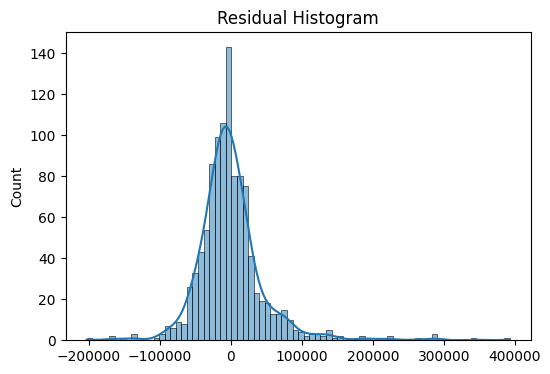

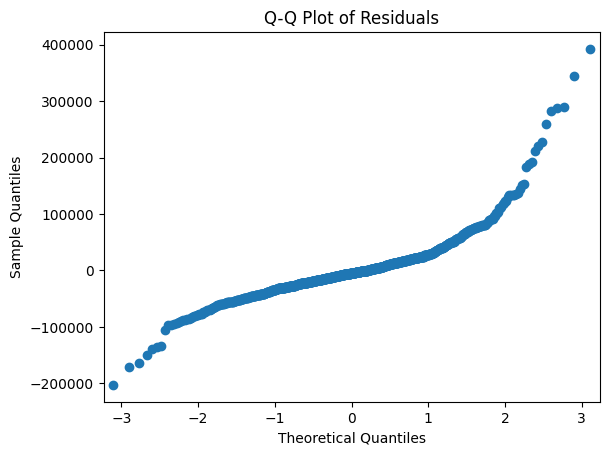

In [63]:
# Histogram
plt.figure(figsize=(6,4))
sns.histplot(full_residuals, kde=True)
plt.title("Residual Histogram")
plt.show()

# Q-Q plot
sm.qqplot(full_residuals)
plt.title("Q-Q Plot of Residuals")
plt.show()

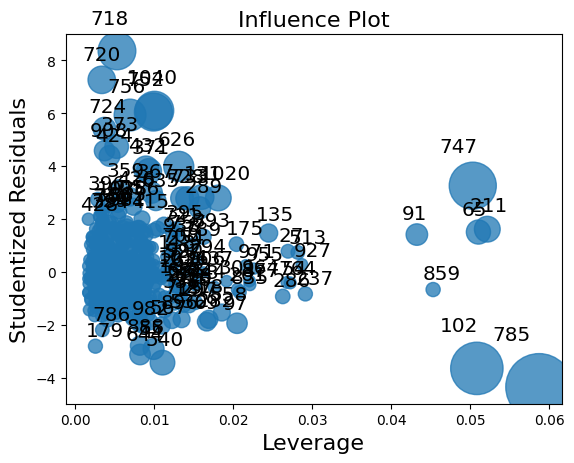

In [64]:
# ----- 3. Influence Plot -----
sm.graphics.influence_plot(full_m, criterion="cooks")
plt.show()

In [65]:
# True and predicted values
y_true = hp['Price']
y_pred = full_m.fittedvalues
residuals = y_true - y_pred

# Key statistics
r2 = r2_score(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

print("----- Model Validation Metrics -----")
print(f"Mean of residuals: {residuals.mean():.2f}")
print(f"Standard deviation of residuals: {residuals.std():.2f}")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

----- Model Validation Metrics -----
Mean of residuals: -0.00
Standard deviation of residuals: 48500.72
R²: 0.6049
MSE: 2350094011.84
RMSE: 48477.77
MAE: 31069.49


Mean of residuals ≈ 0
This is ideal. On average, predictions are unbiased.

Standard deviation of residuals ≈ 48,501
Typical spread of errors around the predicted prices.

R² ≈ 0.605
About 60.5% of the variation in Price is explained by Living Area, Bedrooms, Bathrooms, Fireplaces, Age.

MSE ≈ 2.35 × 10⁹
Average squared error looks large due to Price being large.

RMSE ≈ 48,478
On average, predictions are off by around $48k.

MAE ≈ 31,069
The average absolute error is about $31k, which is slightly smaller than RMSE (expected if larger errors exist).